In [1]:
# https://www.datascience.com/blog/k-means-clustering
# scikit kmeans: http://scikit-learn.org/stable/modules/clustering.html#k-means

import h2o
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,4 hours 5 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,16 days
H2O cluster name:,H2O_started_from_R_avkashchauhan_muc360
H2O cluster total nodes:,1
H2O cluster free memory:,3.219 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [3]:
hdf = h2o.import_file("https://raw.githubusercontent.com/h2oai/h2o-tutorials/master/training/ceder-rapids/data_1024.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
hdf.describe()

Rows:4000
Cols:3




,Driver_ID,Distance_Feature,Speeding_Feature
type,int,real,int
mins,3423310448.0,15.52,0.0
mean,3423312447.5,76.0415225,10.721
maxs,3423314447.0,244.79,100.0
sigma,1154.84486693,53.4695625748,13.7085425934
zeros,0,0,23
missing,0,0,0
0,3423311935.0,71.24,28.0
1,3423313212.0,52.53,25.0
2,3423313724.0,64.54,27.0


In [7]:
hdf.head(5)

Distance_Feature,Speeding_Feature
71.24,28
52.53,25
64.54,27
55.69,22
54.58,25


In [8]:
hdf = hdf[:,['Distance_Feature', 'Speeding_Feature']]

In [9]:
hdf

Distance_Feature,Speeding_Feature
71.24,28
52.53,25
64.54,27
55.69,22
54.58,25
41.91,10
58.64,20
52.02,8
31.25,34
44.31,19


In [10]:
type(hdf)

h2o.frame.H2OFrame

In [11]:
# Distance_Feature: mean distance driven per day
# Speeding_Feature: mean percentage of time a driver was >5 mph over the speed limit.
df = hdf.as_data_frame()

In [12]:
type(df)

pandas.core.frame.DataFrame

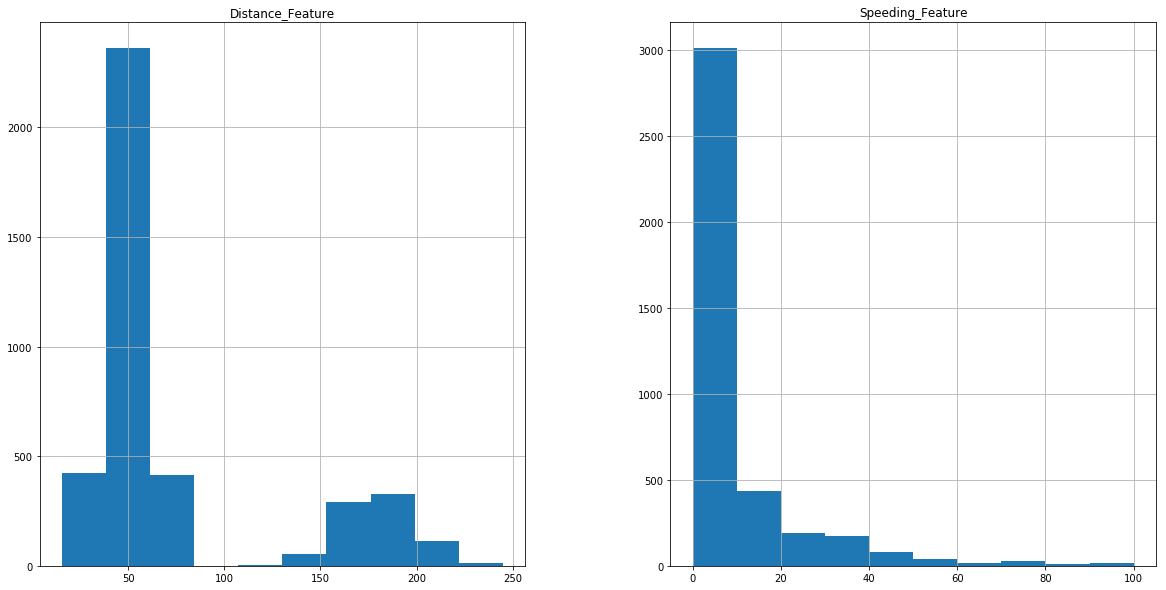

In [13]:
import pylab as pl
hdf.as_data_frame().hist(figsize=(20,10))
pl.show()

In [14]:
df.head(5)

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


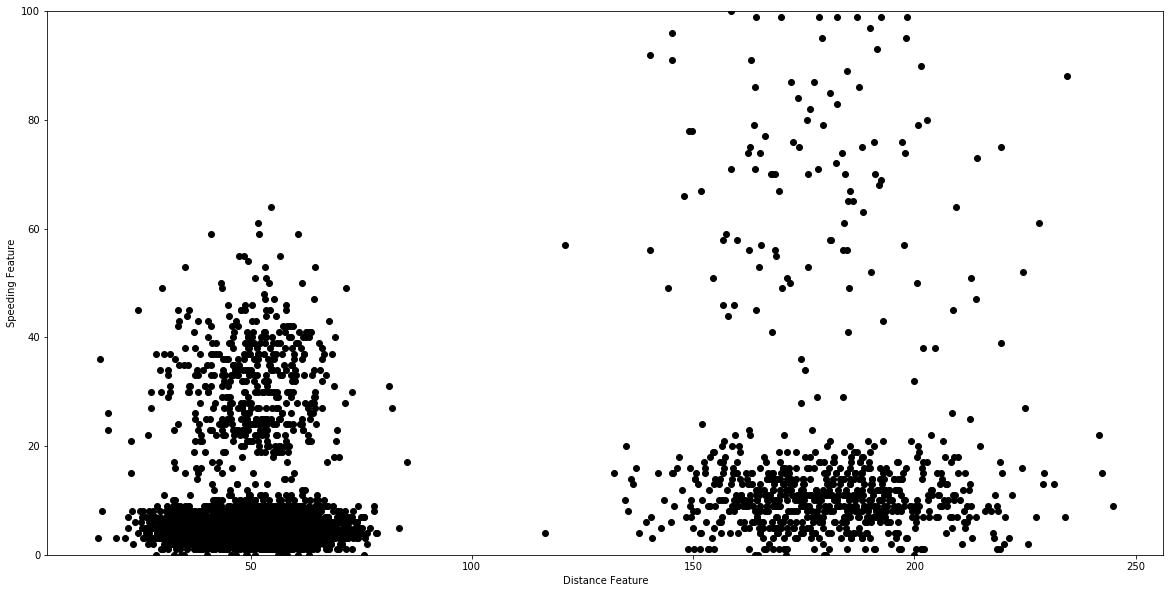

In [15]:
plt.figure(figsize=(20,10))
plt.plot(df.Distance_Feature,df.Speeding_Feature,'ko')
plt.ylabel('Speeding Feature')
plt.xlabel('Distance Feature')
plt.ylim(0,100)
plt.show()

In [16]:
from sklearn.cluster import KMeans
import numpy as np

### For the purposes of this example, we store feature data from our dataframe `df`, in the `f1` and `f2` arrays. We combine this into a feature matrix `X` before entering it into the algorithm.
f1 = df['Distance_Feature'].values
f2 = df['Speeding_Feature'].values

X=np.matrix(zip(f1,f2))
kmeans = KMeans(n_clusters=2).fit(X)

In [17]:
df.shape

(4000, 2)

In [19]:
print(len(kmeans.labels_))
kmeans.labels_

4000


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [20]:
df_labels = pd.DataFrame(kmeans.labels_,columns=["labels"])

In [21]:
df['labels'] = df_labels['labels']

In [23]:
df.head(5)

,Distance_Feature,Speeding_Feature,labels
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0


In [22]:
df.tail(5)

,Distance_Feature,Speeding_Feature,labels
3995,160.04,10,1
3996,176.17,5,1
3997,170.91,12,1
3998,176.14,5,1
3999,168.03,9,1


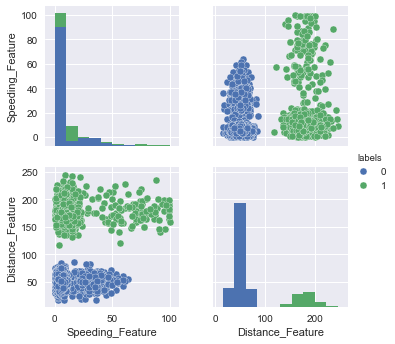

In [24]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.pairplot(df, vars=["Speeding_Feature" , "Distance_Feature"], hue="labels");
plt.show()

(50.047634375000001, 8.8287499999999994)
(180.01707500000001, 18.289999999999999)


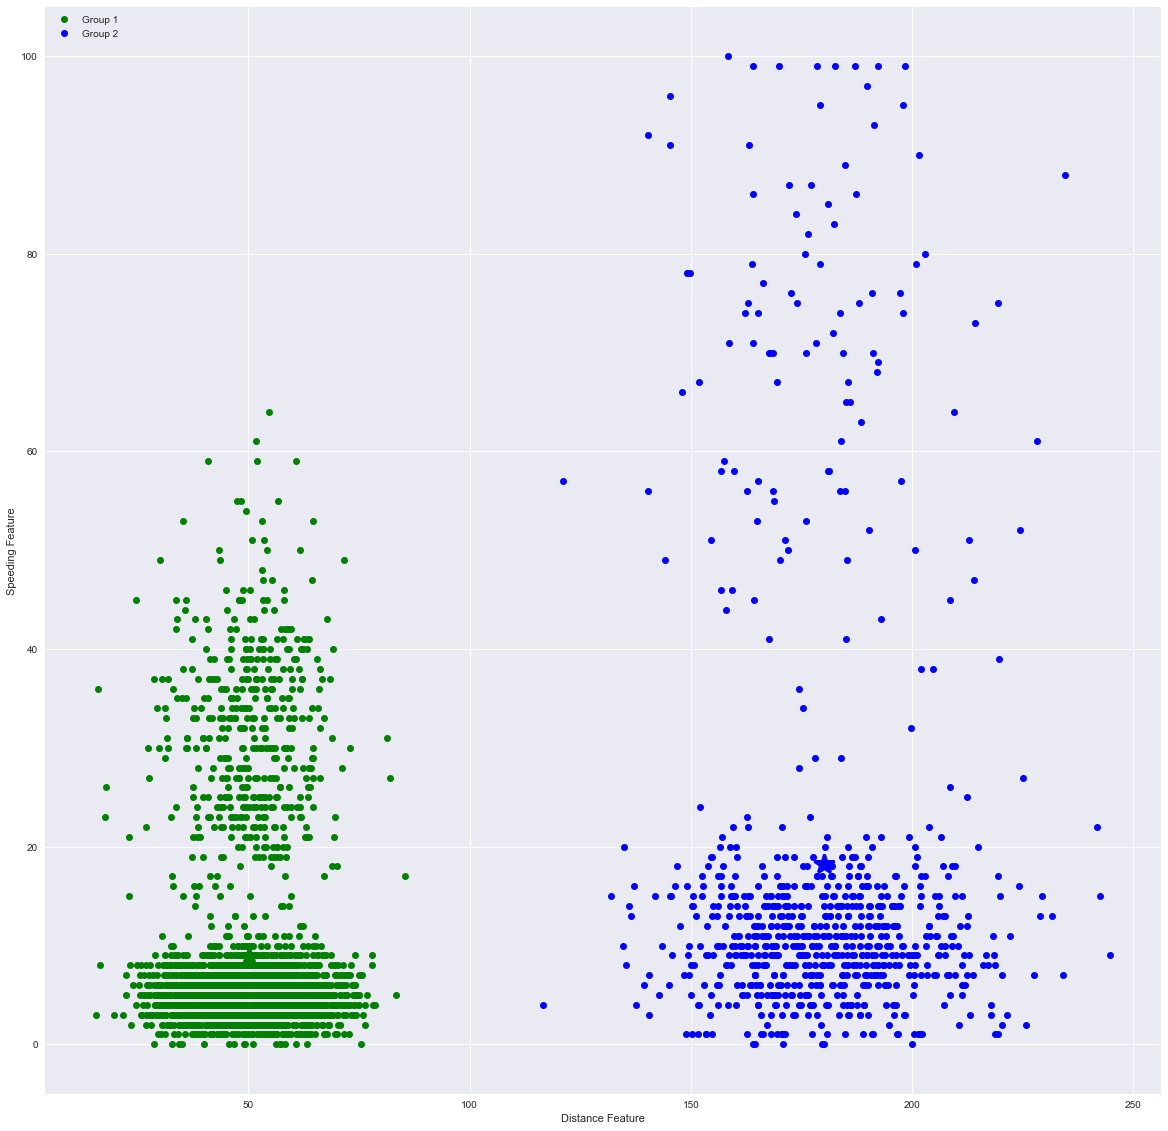

In [25]:
plt.figure(figsize=(20,20))

h1,=plt.plot(f1[kmeans.labels_==0],f2[kmeans.labels_==0],'go')
plt.plot(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]),'g*',markersize=20,mew=3)
# print centroid 1
print(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]))
h2,=plt.plot(f1[kmeans.labels_==1],f2[kmeans.labels_==1],'bo')
plt.plot(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]),'b*',markersize=20,mew=3)
# print centroid 2
print(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]))
plt.ylabel('Speeding Feature')
plt.xlabel('Distance Feature')

plt.legend([h1,h2],['Group 1','Group 2'], loc='upper left')
plt.show()

In [26]:
kmeans = KMeans(n_clusters=4).fit(X)

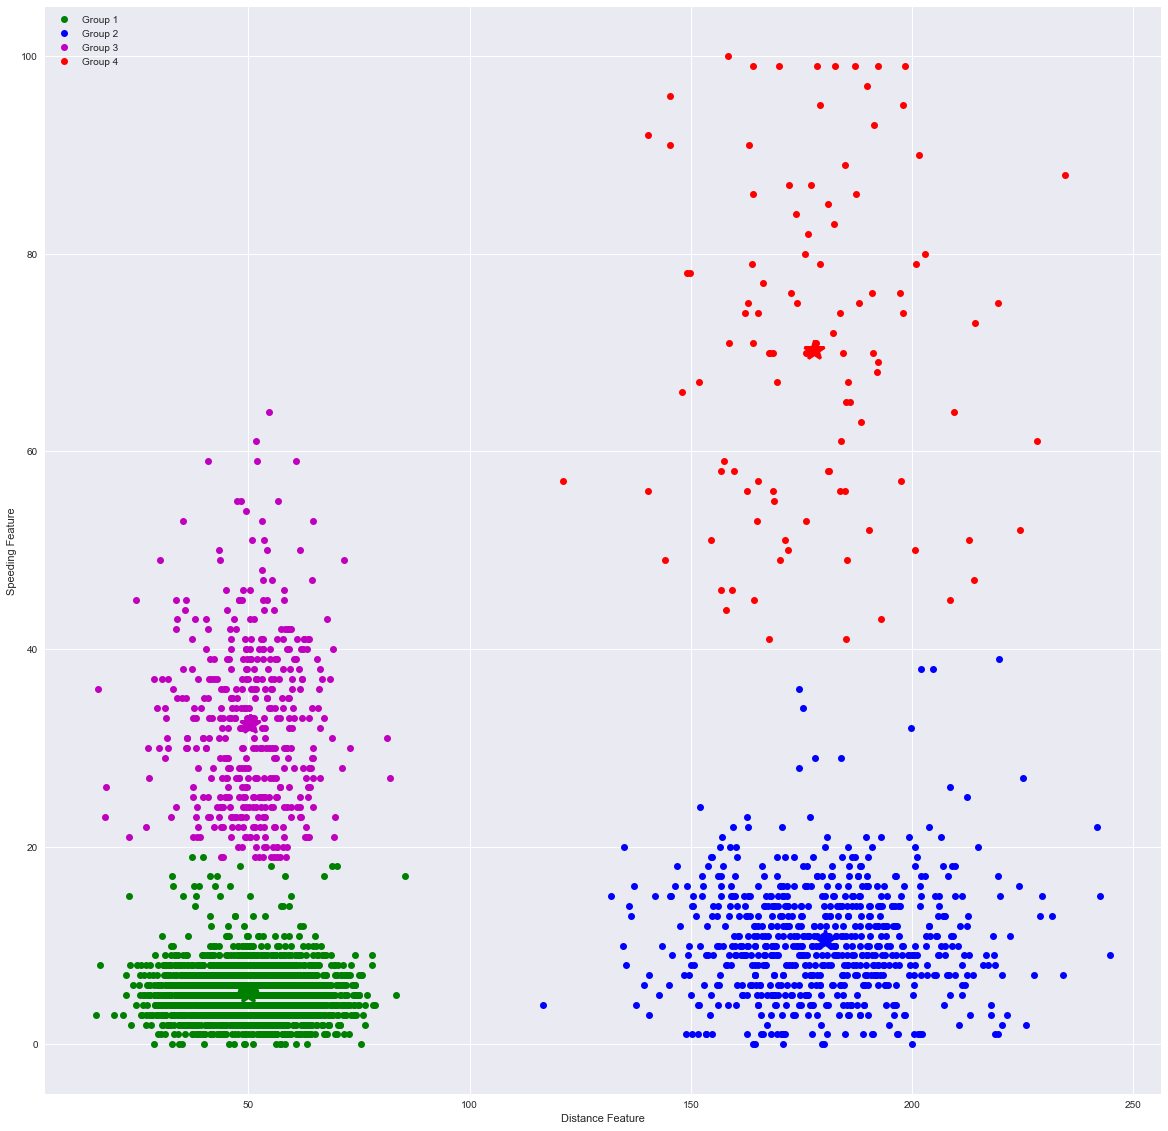

In [27]:
# Plot the results
plt.figure(figsize=(20,20))
h1,=plt.plot(f1[kmeans.labels_==0],f2[kmeans.labels_==0],'go')

plt.plot(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]),'g*',markersize=20,mew=3)
h2,=plt.plot(f1[kmeans.labels_==1],f2[kmeans.labels_==1],'bo')
plt.plot(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]),'b*',markersize=20,mew=3)
h3,=plt.plot(f1[kmeans.labels_==2],f2[kmeans.labels_==2],'mo')
plt.plot(np.mean(f1[kmeans.labels_==2]),np.mean(f2[kmeans.labels_==2]),'m*',markersize=20,mew=3)
h4,=plt.plot(f1[kmeans.labels_==3],f2[kmeans.labels_==3],'ro')
plt.plot(np.mean(f1[kmeans.labels_==3]),np.mean(f2[kmeans.labels_==3]),'r*',markersize=20,mew=3)
plt.ylabel('Speeding Feature')
plt.xlabel('Distance Feature')
plt.legend([h1,h2,h3,h4],['Group 1','Group 2','Group 3','Group 4'], loc='upper left')
plt.show()

In [28]:
kmeans.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [29]:
df_labels = pd.DataFrame(kmeans.labels_,columns=["labels"])

In [30]:
df['labels'] = df_labels['labels']

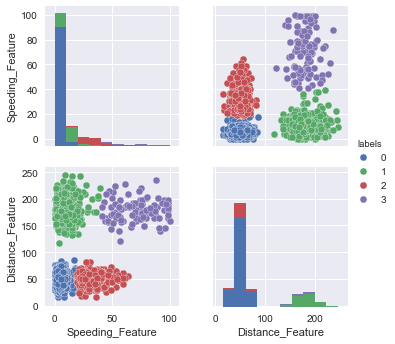

In [31]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.pairplot(df, vars=["Speeding_Feature" , "Distance_Feature"], hue="labels");
plt.show()

In [35]:
from h2o.estimators.kmeans import H2OKMeansEstimator

In [32]:
type(hdf)

h2o.frame.H2OFrame

In [33]:
hdf 

Distance_Feature,Speeding_Feature
71.24,28
52.53,25
64.54,27
55.69,22
54.58,25
41.91,10
58.64,20
52.02,8
31.25,34
44.31,19


In [36]:
results = [H2OKMeansEstimator(k=clusters, init="Random", seed=2, standardize=True) for clusters in range(2,13)]
for estimator in results:
    estimator.train(x=hdf.col_names, training_frame = hdf)

kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [72]:
estimator = H2OKMeansEstimator(k=2, init="Random", seed=2, standardize=True)
estimator.train(x=hdf.col_names, training_frame = hdf)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [56]:
estimator = H2OKMeansEstimator(k=100, estimate_k = True,  init="Random", seed=2, standardize=True)
estimator.train(x=hdf.col_names, training_frame = hdf)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [73]:
print(estimator.predict_leaf_node_assignment)

Model Details
H2OKMeansEstimator :  K-means
Model Key:  KMeans_model_python_1509984533699_6811


ModelMetricsClustering: kmeans
** Reported on train data. **

MSE: NaN
RMSE: NaN
Total Within Cluster Sum of Square Error: 4420.94841519
Total Sum of Square Error to Grand Mean: 9202.00000093
Between Cluster Sum of Square Error: 4781.05158574
Centroid Statistics: 


,centroid,size,within_cluster_sum_of_squares
,1.0,3201.0,2225.0562067
,2.0,799.0,2195.8922085


Scoring History: 


,timestamp,duration,iterations,number_of_reassigned_observations,within_cluster_sum_of_squares
,2017-11-06 12:23:42,0.001 sec,0.0,nan,nan
,2017-11-06 12:23:42,0.002 sec,1.0,4000.0,7282.4807993
,2017-11-06 12:23:43,0.003 sec,2.0,149.0,4769.4327116
,2017-11-06 12:23:43,0.003 sec,3.0,81.0,4660.8429373
,2017-11-06 12:23:43,0.003 sec,4.0,73.0,4598.4506783
,2017-11-06 12:23:43,0.004 sec,5.0,70.0,4525.8436485
,2017-11-06 12:23:43,0.004 sec,6.0,44.0,4450.0612095
,2017-11-06 12:23:43,0.005 sec,7.0,8.0,4422.4611569
,2017-11-06 12:23:43,0.005 sec,8.0,1.0,4420.9698287
,2017-11-06 12:23:43,0.005 sec,9.0,0.0,4420.9484088


<bound method H2OKMeansEstimator.predict_leaf_node_assignment of >


In [74]:
predicted = estimator.predict(hdf)

kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [75]:
predicted['predict'].unique()

C1
0
1


In [76]:
predicted.head()

predict
0
0
0
0
0
0
0
0
0
0


In [77]:
predicted.tail()

predict
1
1
1
1
1
1
1
1
1
1


In [78]:
hdf["labels"] = predicted["predict"].asfactor()

In [79]:
hdf.head(5)

Distance_Feature,Speeding_Feature,labels
71.24,28,0
52.53,25,0
64.54,27,0
55.69,22,0
54.58,25,0


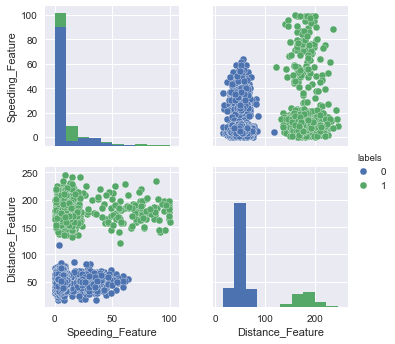

In [80]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.pairplot(hdf.as_data_frame(), vars=["Speeding_Feature" , "Distance_Feature"], hue="labels");
plt.show()

In [82]:
px = predicted.as_data_frame()

In [83]:
px_list = px['predict'].values.tolist()

In [84]:
px_array = np.array(px_list, dtype=np.int32)

In [85]:
px_array

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [86]:
# Plot the results
def plot_kmeans_labels(labels):
    plt.figure(figsize=(20,10))
    h1,=plt.plot(f1[labels==0],f2[labels==0],'go')

    plt.plot(np.mean(f1[labels==0]),np.mean(f2[labels==0]),'g*',markersize=20,mew=3)
    h2,=plt.plot(f1[labels==1],f2[labels==1],'bo')
    plt.plot(np.mean(f1[labels==1]),np.mean(f2[labels==1]),'b*',markersize=20,mew=3)
    h3,=plt.plot(f1[labels==2],f2[labels==2],'mo')
    plt.plot(np.mean(f1[labels==2]),np.mean(f2[labels==2]),'m*',markersize=20,mew=3)
    h4,=plt.plot(f1[labels==3],f2[labels==3],'ro')
    plt.plot(np.mean(f1[labels==3]),np.mean(f2[labels==3]),'r*',markersize=20,mew=3)
    plt.ylabel('Speeding Feature')
    plt.xlabel('Distance Feature')
    plt.legend([h1,h2,h3,h4],['Group 1','Group 2','Group 3','Group 4'], loc='upper left')
    plt.show()

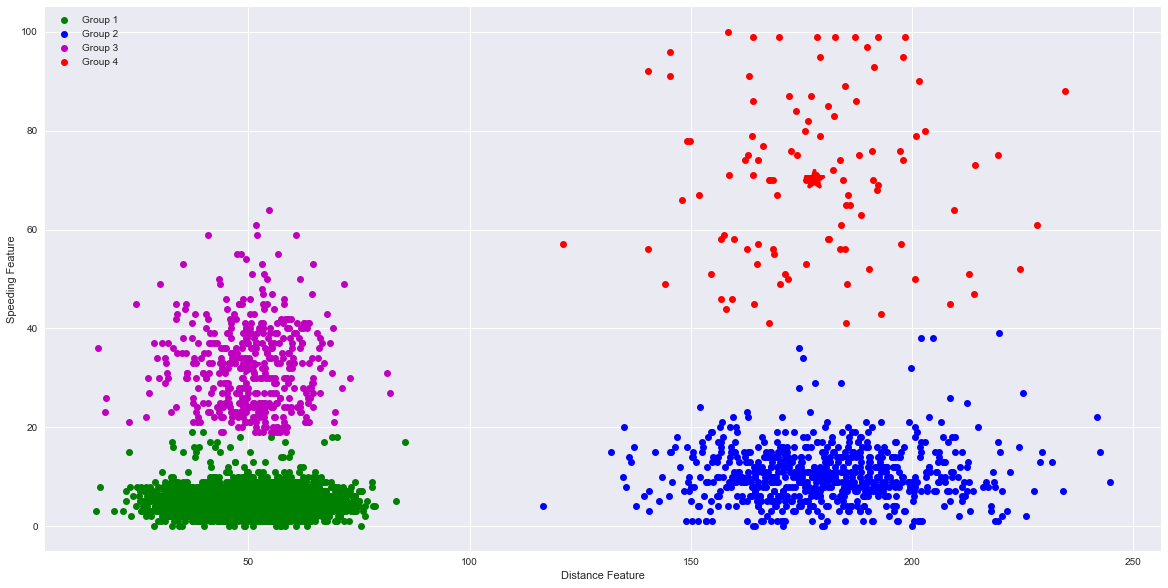

In [87]:
plot_kmeans_labels(kmeans.labels_)

/Users/avkashchauhan/anaconda3/envs/python27/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/avkashchauhan/anaconda3/envs/python27/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


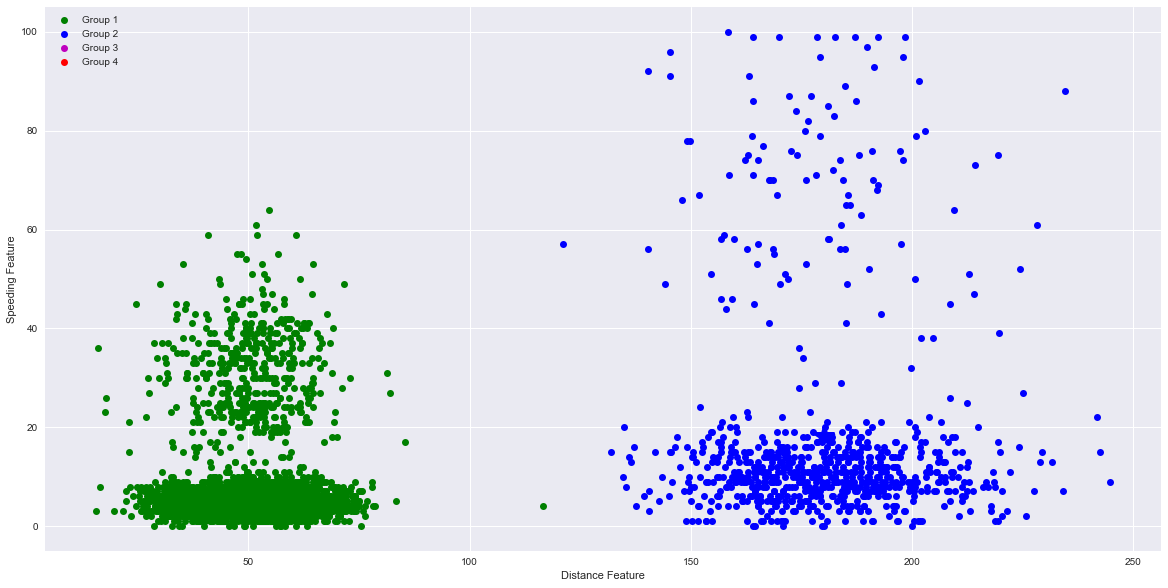

In [88]:
plot_kmeans_labels(px_array)